In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os



In [2]:
df = pd.read_csv('laptop_price.csv',encoding="latin1")

# Data Preprocessing

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### Moving forward,we will proceed to analyze each column related to the price individually, implementing various feature engineering techniques along the way

In [9]:
df['Ram']= df['Ram'].str.replace('GB','').astype(int)
df['Weight']= df['Weight'].str.replace('kg','').astype(float)

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


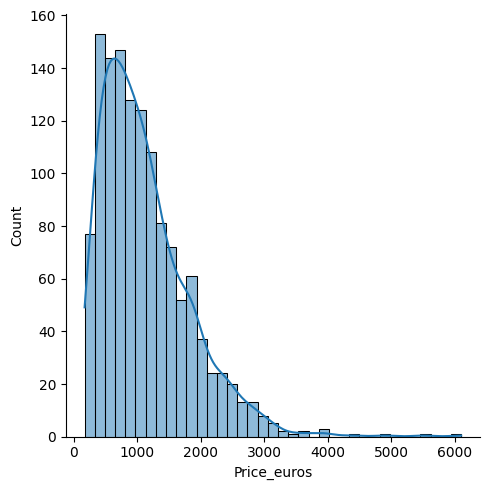

In [12]:

sns.displot(df['Price_euros'],kde=True)

<Axes: xlabel='Company'>

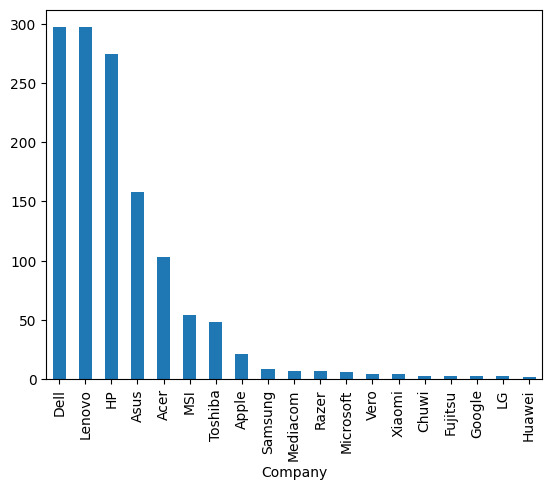

In [13]:
df['Company'].value_counts().plot(kind='bar')

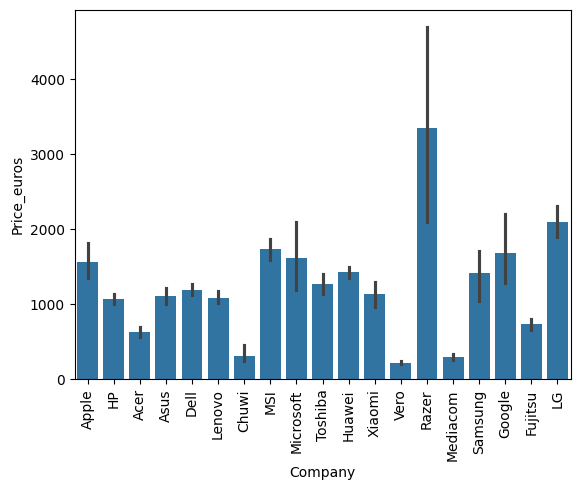

In [14]:
sns.barplot(x=df['Company'], y=df['Price_euros'])
plt.xticks(rotation='vertical');

<Axes: xlabel='TypeName'>

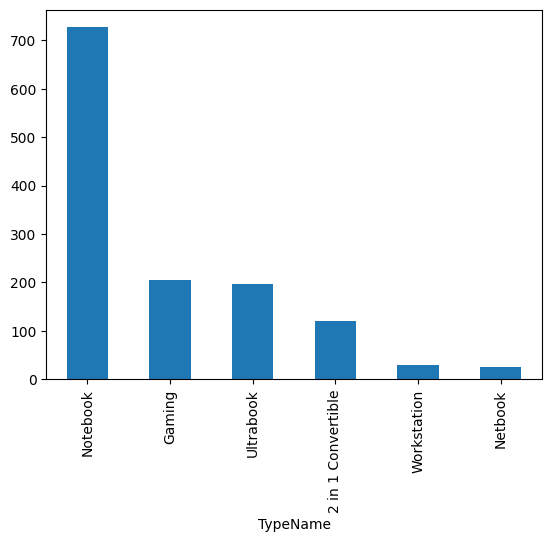

In [15]:
df['TypeName'].value_counts().plot(kind='bar')

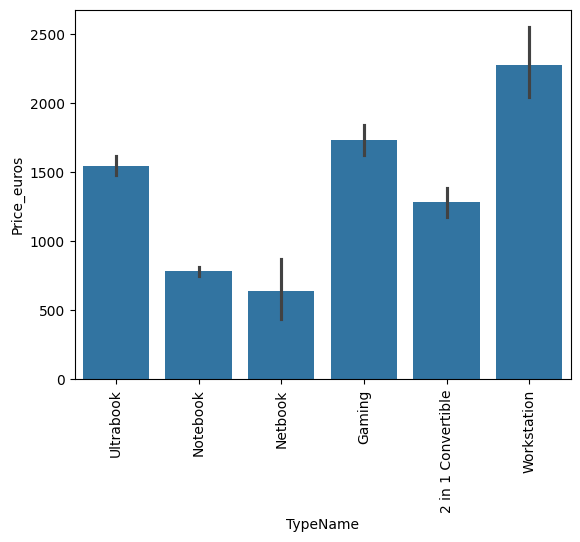

In [16]:
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation='vertical');

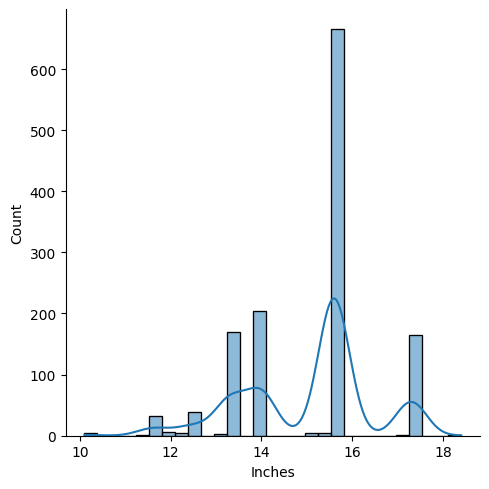

In [17]:
sns.displot(df['Inches'],kde=True)

<Axes: xlabel='Inches', ylabel='Price_euros'>

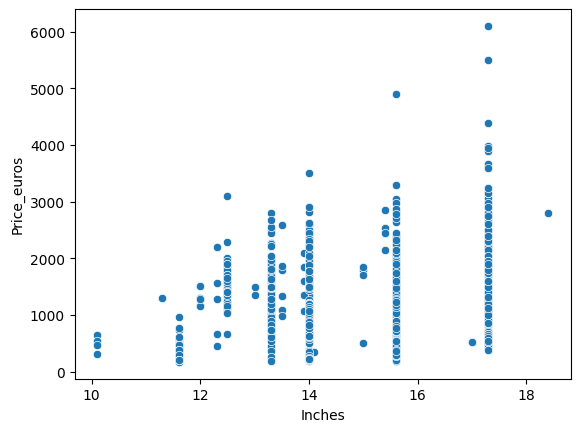

In [18]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])

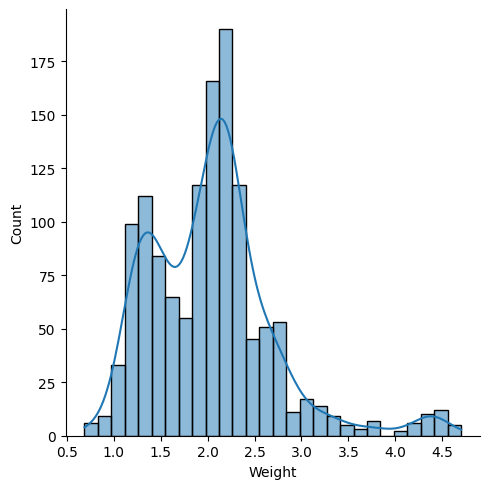

In [19]:
sns.displot(df['Weight'],kde=True)

<Axes: xlabel='Weight', ylabel='Price_euros'>

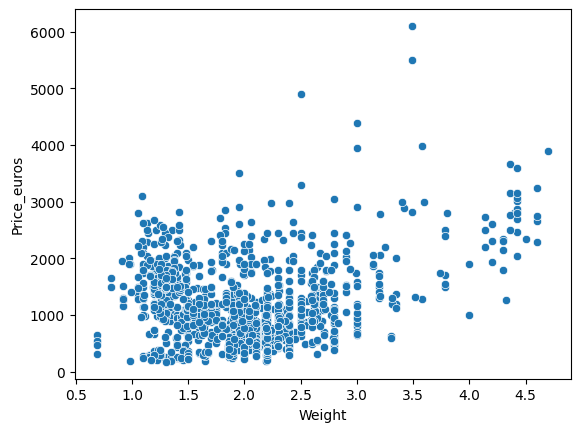

In [20]:
sns.scatterplot(x=df['Weight'], y=df['Price_euros'])

**In `ScreenResolution`, it provides 3 different information. Now we're going to extract these 3 information**

In [21]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [22]:
df['touch_screen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df['IPS_display']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [24]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display
288,293,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1179.00,0,1
249,254,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2040.00,0,1
413,420,Acer,Aspire R7,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,789.01,1,1
858,869,Dell,Inspiron 5368,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,1.62,649.00,1,0
1184,1202,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,799.00,0,1


In [25]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [26]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


In [27]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
df['X_res']= new[0]
df['y_res']= new[1]

In [29]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,X_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [30]:
import re

# Extract the numbers from the columns using a lambda function
df['X_res'] = list(map(lambda x: re.sub(r'\D', '', x), df['X_res']))

In [31]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,X_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [32]:
df['X_res']= df['X_res'].astype(int)
df['y_res']= df['y_res'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
 13  touch_screen      1303 non-null   int64  
 14  IPS_display       1303 non-null   int64  
 15  X_res             1303 non-null   int64  
 16  y_res             1303 non-null   int64  


In [34]:
# 1️⃣ اختار الأعمدة الرقمية بس
numeric_df = df.select_dtypes(include='number')

# 2️⃣ احسب correlation مع Price_euros
corr_price_df = pd.DataFrame(numeric_df.corr()['Price_euros'])

print(corr_price_df)


              Price_euros
laptop_ID        0.067830
Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
touch_screen     0.191226
IPS_display      0.252208
X_res            0.363806
y_res            0.552809


<Axes: xlabel='touch_screen'>

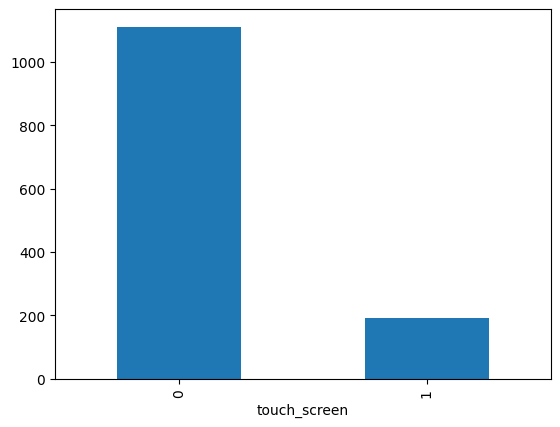

In [35]:
df['touch_screen'].value_counts().plot(kind='bar')

**Correlation of Numerical columns with Price**

<Axes: xlabel='touch_screen', ylabel='Price_euros'>

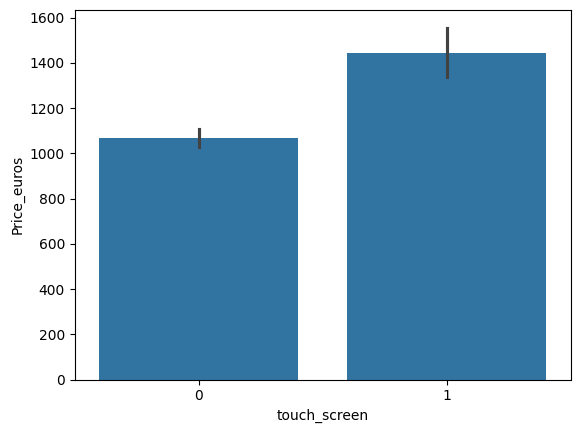

In [36]:
sns.barplot(x=df['touch_screen'],y=df['Price_euros'])

<Axes: xlabel='IPS_display'>

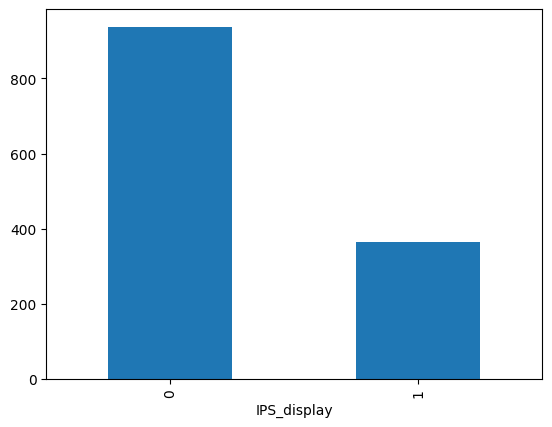

In [37]:
df['IPS_display'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS_display', ylabel='Price_euros'>

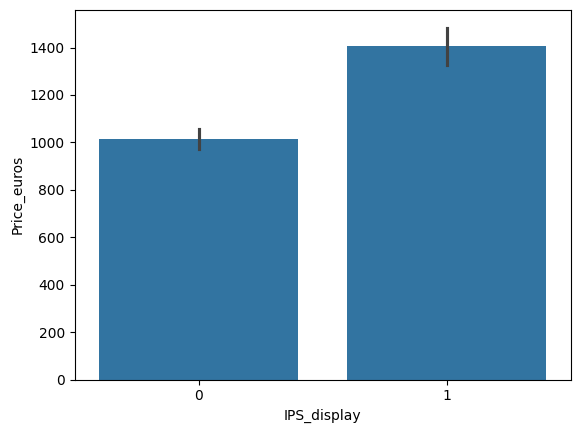

In [38]:
sns.barplot(x=df['IPS_display'],y=df['Price_euros'])

**Now we create PPI(Pixel Per Inch) column from `X_res,y_res and Inches` . The purpose of creating the`PPI` column is to measure the pixel density of the laptop's display, providing a metric that quantifies the number of pixels per inch**

In [39]:
df['PPI']= (((df['X_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype(float)

In [40]:
df['PPI']=round(df['PPI'],2)

In [41]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,X_res,y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.98
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.68
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.21
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.53
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.98


In [42]:
# 1️⃣ اختار الأعمدة الرقمية بس
numeric_df = df.select_dtypes(include='number')

# 2️⃣ احسب correlation مع Price_euros
corr_price_df = pd.DataFrame(numeric_df.corr()['Price_euros'])

print(corr_price_df)


              Price_euros
laptop_ID        0.067830
Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
touch_screen     0.191226
IPS_display      0.252208
X_res            0.363806
y_res            0.552809
PPI              0.351860


**Next, focus on performing feature engineering on the `CPU`.**

In [43]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [44]:
df['CPU_name']= df['Cpu'].apply(lambda x:"".join(x.split()[:3]))

In [45]:
df.sample(7)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,X_res,y_res,PPI,CPU_name
392,399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,693.99,0,1,1366,768,100.45,IntelCorei5
742,750,Toshiba,Tecra X40-D-10G,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,1535.00,1,1,1920,1080,157.35,IntelCorei5
1289,1307,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,729.00,0,1,1920,1080,165.63,IntelCoreM
697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,669.00,1,0,1920,1080,176.23,IntelCoreM
893,904,Lenovo,ThinkPad T470s,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,1799.00,0,1,1920,1080,157.35,IntelCorei5
355,361,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,970.90,0,0,1920,1080,141.21,IntelCorei7
1119,1134,Asus,Rog GL752VW-T4308T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,1312.49,0,0,1920,1080,127.34,IntelCorei7


In [46]:
df['CPU_name'].unique()

array(['IntelCorei5', 'IntelCorei7', 'AMDA9-Series9420', 'IntelCorei3',
       'IntelCoreM', 'IntelAtomx5-Z8350', 'AMDE-SeriesE2-9000e',
       'IntelAtomx5-Z8300', 'AMDE-SeriesE2-6110', 'AMDA6-Series9220',
       'IntelCeleronDual', 'AMDRyzen1700', 'IntelPentiumQuad',
       'IntelAtomx5-Z8550', 'AMDFX9830P', 'AMDE-Series6110',
       'IntelXeonE3-1505M', 'AMDE-Series9000e', 'AMDA10-SeriesA10-9620P',
       'AMDA6-SeriesA6-9220', 'AMDA10-Series9600P', 'AMDA8-Series7410',
       'AMDA12-Series9720P', 'IntelCeleronQuad', 'AMDRyzen1600',
       'AMDA10-Series9620P', 'AMDE-Series7110', 'AMDA9-SeriesA9-9420',
       'IntelXeonE3-1535M', 'AMDE-SeriesE2-9000', 'AMDA6-Series7310',
       'IntelAtomZ8350', 'IntelPentiumDual', 'AMDA12-Series9700P',
       'AMDA4-Series7210', 'AMDFX8800P', 'IntelAtomX5-Z8350',
       'SamsungCortexA72&A53', 'AMDE-Series9000', 'AMDA9-Series9410'],
      dtype=object)

In [47]:
def processor(x):
    if x=='IntelCorei5' or x== 'IntelCorei7'or x=='IntelCorei3':
        return x
    if x.split()[0]=='AMD':
        return 'AMD Processor'
    if x.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'Samsung Processor'
       
    

In [48]:
df['CPU']= df['CPU_name'].apply(processor) 

In [49]:
df.sample()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,X_res,y_res,PPI,CPU_name,CPU
1158,1176,Lenovo,B51-80 (i5-6200U/8GB/1008GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.5,788.49,0,0,1920,1080,141.21,IntelCorei5,IntelCorei5


**Next step is performing feature engineering on the `Memory` column**

In [50]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [51]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

import re

df['Hybrid'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) Hybrid', x)[0] if re.findall(r'(\d+) Hybrid', x) else 0).astype(int)
df['SSD'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) SSD', x)[0] if re.findall(r'(\d+) SSD', x) else 0).astype(int)
df['HDD'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) HDD', x)[0] if re.findall(r'(\d+) HDD', x) else 0).astype(int)
df['Flash_Storage'] = df['Memory'].apply(lambda x: re.findall(r'(\d+) Flash Storage', x)[0] if re.findall(r'(\d+) Flash Storage', x) else 0).astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\abnso\AppData\Local\Temp\ipykernel_22004\1598506847.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [52]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,IPS_display,X_res,y_res,PPI,CPU_name,CPU,Hybrid,SSD,HDD,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,...,1,2560,1600,226.98,IntelCorei5,IntelCorei5,0,128,0,0


In [53]:
df.drop(columns=['CPU_name','Memory','Cpu','laptop_ID','ScreenResolution','X_res','y_res','Product'],inplace=True)

In [54]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,PPI,CPU,Hybrid,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98,IntelCorei5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68,IntelCorei5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21,IntelCorei5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53,IntelCorei7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98,IntelCorei5,0,256,0,0


In [55]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# حول الأعمدة النصية لأرقام
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# حساب correlation
corr_price_all = df_encoded.corr()['Price_euros']
print(corr_price_all)


Company          0.140371
TypeName        -0.127313
Inches           0.068197
Ram              0.743007
Gpu              0.443299
OpSys            0.288911
Weight           0.210370
Price_euros      1.000000
touch_screen     0.191226
IPS_display      0.252208
PPI              0.351860
CPU              0.100649
Hybrid           0.007989
SSD              0.676202
HDD             -0.095672
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64


**Correlation of Price with `Flash_Storage` and `Hybrid` is Negative. So remove these columns**

In [56]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

**Next step is performing feature engineering on the `Gpu` column**

In [57]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [58]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [59]:
def Gpu(x):
    if x.split()[0]=='AMD':
        return 'AMD'
    if x.split()[0]=='Intel':
        return 'Intel'
    if x.split()[0]=='Nvidia':
        return 'Nvidia'
    else:
        return 'ARM'

In [60]:
df['GPU_brand']= df['Gpu'].apply(Gpu)

In [61]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,touch_screen,IPS_display,PPI,CPU,SSD,HDD,GPU_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98,IntelCorei5,128,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68,IntelCorei5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21,IntelCorei5,256,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53,IntelCorei7,512,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98,IntelCorei5,256,0,Intel


In [62]:
df.drop(columns=['Gpu','Inches'],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Ram           1303 non-null   int64  
 3   OpSys         1303 non-null   object 
 4   Weight        1303 non-null   float64
 5   Price_euros   1303 non-null   float64
 6   touch_screen  1303 non-null   int64  
 7   IPS_display   1303 non-null   int64  
 8   PPI           1303 non-null   float64
 9   CPU           1303 non-null   object 
 10  SSD           1303 non-null   int64  
 11  HDD           1303 non-null   int64  
 12  GPU_brand     1303 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 132.5+ KB


In [64]:
df.GPU_brand.value_counts()

GPU_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

**In GPU_brand there is only one `ARM` so there is no need of ARM**

In [65]:
df= df[df['GPU_brand']!='ARM']

<Axes: xlabel='GPU_brand', ylabel='Price_euros'>

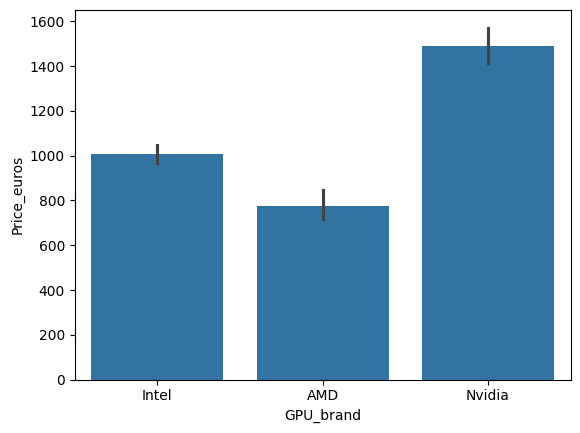

In [66]:
sns.barplot(x=df['GPU_brand'],y=df['Price_euros'])

**Moving forward, explore`OpSys` column**

In [67]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [68]:
col= {'Mac OS X':'Mac','macOS':'Mac'}
df['OpSys'].replace(col,inplace=True)

C:\Users\abnso\AppData\Local\Temp\ipykernel_22004\3741617760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSys'].replace(col,inplace=True)


In [69]:
def OS(x):
    if x.split()[0]=='Windows':
        return 'Windows'
    if x.split()[0]=='Mac':
        return 'Mac'
    if x.split()[0]=='Linux':
        return 'Linux'
    else:
        return 'Other OS'

In [70]:
df['OS']= df['OpSys'].apply(OS)

In [71]:
df['OS'].value_counts()

OS
Windows     1125
Other OS      94
Linux         62
Mac           21
Name: count, dtype: int64

<Axes: xlabel='OS', ylabel='Price_euros'>

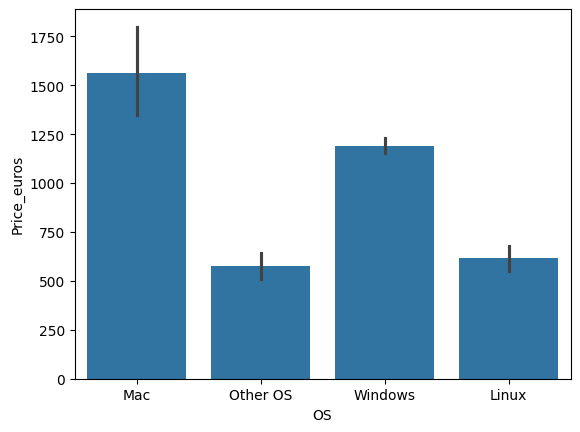

In [72]:
sns.barplot(x=df['OS'],y=df['Price_euros'])

In [73]:
df.drop(columns=['OpSys'],inplace=True)

- Relation of Price and Ram is 0.74
- Relation of Price and SSD is 0.68


In [74]:
import plotly.express as px
fig = px.sunburst(df, path=['Company','Ram','TypeName'], values='Price_euros',color='Price_euros')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

# Data Preparation of ML Model

<Axes: xlabel='Price_euros', ylabel='Count'>

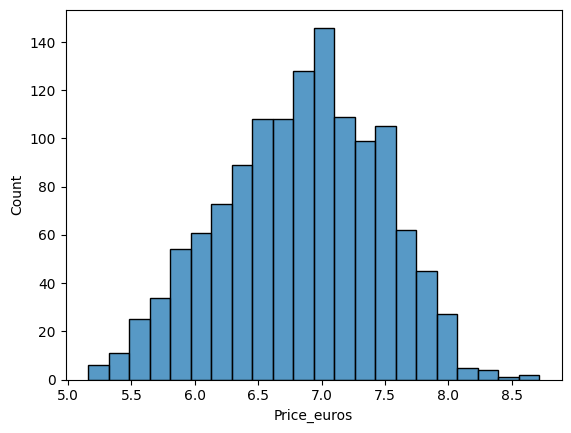

In [75]:
sns.histplot(np.log(df['Price_euros']))

In [76]:
df.to_csv("cleaned_data.csv",index=False)